## Loading Data & Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import re

In [2]:
data = pd.read_csv("Datasets\Wuzzuf-Jobs.csv")

## Sample Of Data

In [3]:
data.head()

,Unnamed: 0,Job title,Company name,Location,Job type,Exp level,Exp years,Skills
0,0,Financial Analysis,Care Services EG -,"Abbassia, Cairo, Egypt",Full Time,Experienced,2 - 4 Yrs of Exp,"Accounting/Finance,Analyst/Research,Accounting..."
1,1,Vulnerability Analysis & Mapping Officer (Econ...,World Food Program - Other locations -,"Cairo, Egypt",Full Time,Not specified,IT/Software Development,"Project/Program Management,Engineering - Telec..."
2,2,Financial Analysis & Planning Manager,Kinetik People -,"Cairo, Egypt",Full Time,Not specified,Accounting/Finance,"Operations/Management,Analyst/Research,Financi..."
3,3,Financial Planning & Analysis Lead,Novartis ÖSterreich -,"Cairo, Egypt",Full Time,Not specified,Accounting/Finance,"Operations/Management,Analyst/Research,Finance..."
4,4,Analysis and Reporting Manager,Antal International - Egypt -,"Cairo, Egypt",Full Time,Not specified,Accounting/Finance,"Operations/Management,Analyst/Research,Finance..."


## More Info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1617 non-null   int64 
 1   Job title     1617 non-null   object
 2   Company name  1617 non-null   object
 3   Location      1617 non-null   object
 4   Job type      1617 non-null   object
 5   Exp level     1617 non-null   object
 6   Exp years     1617 non-null   object
 7   Skills        1617 non-null   object
dtypes: int64(1), object(7)
memory usage: 101.2+ KB


In [5]:
data.describe(include = object)

,Job title,Company name,Location,Job type,Exp level,Exp years,Skills
count,1617,1617,1617,1617,1617,1617,1617
unique,1185,822,102,6,6,117,1540
top,Accountant,Confidential -,"Cairo, Egypt",Full Time,Experienced,3 - 5 Yrs of Exp,"Administration,Banking,Accounting,Finance,Fina..."
freq,59,246,321,1590,937,180,5


In [6]:
# see if we duplicated rows

data.duplicated().sum()

0

## Cleaning

In [7]:
# drop Unnamed: 0 column

data.drop(columns = "Unnamed: 0", inplace = True)

In [8]:
data.sample(3)

,Job title,Company name,Location,Job type,Exp level,Exp years,Skills
1417,PHP Back End Developer,Jumia -,"New Cairo, Cairo, Egypt",Full Time,Experienced,3 - 7 Yrs of Exp,"IT/Software Development,Engineering - Telecom/..."
1305,Marketing Advisor,Alimento -,"Madinaty, Cairo, Egypt",Full Time,Experienced,4 - 20 Yrs of Exp,"Marketing/PR/Advertising,Marketing,sales skill..."
394,National_Financial Analyst,Dubai Festival City -,"Cairo, Egypt",Full Time,Not specified,Accounting/Finance,"Project/Program Management,Analyst/Research,Fi..."


In [9]:
# set style of visualization

sns.set_style("whitegrid")
sns.set_palette("RdBu")

### Discovering `Job title` column

In [10]:
# see first 50 jobs title

data["Job title"].unique()[:50]

array(['Financial Analysis',
       'Vulnerability Analysis & Mapping Officer (Economic/Policy Analyst)',
       'Financial Analysis & Planning Manager',
       'Financial Planning & Analysis Lead',
       'Analysis and Reporting Manager',
       'Senior Analyst,Financial Planning and Analysis',
       'Financial Planning And Analysis Supervisor', 'data analysis',
       'Financial Planning & Analysis Assistant Manager',
       'Senior Financial Planning and Analysis (FP&A) Specialist',
       'business analysis', 'Senior Financial Planning & Analysis',
       'Budgeting & Financial Analysis Manager',
       'Financial analysis accountant and balancers',
       'Associate Manager - Financial Planning & Analysis',
       'Sales support analysis', 'Marketing Research And Analysis',
       'Senior Financial Planning and Analysis (FP&A)',
       'Treasury Manager', 'Financial Analyst',
       'Accounts Receivable Accountant (A/R Accountant)',
       'Financial Planning & Controlling Intern

In [11]:
# see top 50 titles value count 

data["Job title"].value_counts()[:20]

Accountant                         59
Finance Manager                    15
General Accountant                 14
Senior Accountant                  14
Chief Accountant                   12
Accounting Manager                 12
Treasury Manager                   11
Junior Accountant                  11
Marketing Executive                11
Financial Analyst                  10
Internal Auditor                    9
Planning Engineer                   9
Cost Accountant                     9
Internal Audit Manager              8
Business Analyst                    8
Senior Business Analyst             8
Data Analyst                        7
Financial Manager                   7
Sales Marketing Executive           7
Electrical Maintenance Engineer     6
Name: Job title, dtype: int64

In [12]:
# function to remove wordes in Brackets
def remove_Brackets(title):
    
    return title.split('(')[0].strip()
     
# function to remove words after Vertical Line
def remove_VerticalLine(title):
    return title.split("|")[0]

# function to remove Hyphen
def remove_hyphen(title):
    return title.split(" - ")[0]

# function to remove &
def remove_and(title):
    return title.split(" & ")[0]
    
# apply remove Brackets function 
data["Job title"] = data["Job title"].apply(remove_Brackets)

# apply remove Vertical Line function 
data["Job title"] = data["Job title"].apply(remove_VerticalLine)

# apply remove Hyphen function
data["Job title"] = data["Job title"].apply(remove_hyphen)

# apply remove & function
data["Job title"] = data["Job title"].apply(remove_and)

In [13]:
data["Job title"].unique()[:50]

array(['Financial Analysis', 'Vulnerability Analysis',
       'Financial Planning', 'Analysis and Reporting Manager',
       'Senior Analyst,Financial Planning and Analysis',
       'Financial Planning And Analysis Supervisor', 'data analysis',
       'Senior Financial Planning and Analysis', 'business analysis',
       'Senior Financial Planning', 'Budgeting',
       'Financial analysis accountant and balancers', 'Associate Manager',
       'Sales support analysis', 'Marketing Research And Analysis',
       'Treasury Manager', 'Financial Analyst',
       'Accounts Receivable Accountant', 'CFO',
       'Quality Assurance Section Head', 'Finance Director',
       'Chief Accountant', 'Chief Financial Officer', 'Business Analyst',
       'Financial Auditor', 'Data Engineer',
       'Financial Planning, Budgeting', 'Financial Analyst Lead',
       'Monitoring Assistant SC, L5', 'System Analyst',
       'National_Financial Analyst ', 'Implementation Consultant',
       'Senior Software Busi

In [14]:
data["Job title"].value_counts()[:20]

Accountant                   69
Finance Manager              19
Senior Accountant            18
General Accountant           17
Chief Accountant             15
Accounting Manager           15
Financial Analyst            13
Treasury Manager             12
Marketing Executive          12
Junior Accountant            11
Financial Manager            11
Planning Engineer            10
Business Analyst             10
Internal Auditor              9
Cost Accountant               9
Data Analyst                  8
Senior Business Analyst       8
Internal Audit Manager        8
Sales Marketing Executive     7
Purchasing Manager            7
Name: Job title, dtype: int64

-  `We don't need to clean the column any more, but it still needs cleaning`

### Discovering `Company name` column

In [15]:
data["Company name"].unique()[:50]

array(['Care Services EG -', 'World Food Program - Other locations -',
       'Kinetik People -', 'Novartis ÖSterreich -',
       'Antal International - Egypt -', 'S. C. Johnson & Son, Inc. -',
       'Confidential -', 'Network International -Egypt -', 'ARPUPLUS -',
       'B-Solution -', 'Royal Investment -', 'Fine Hygienic Holding -',
       'Selah ElTelmeez For Publishing & printing -', 'Spinneys Egypt -',
       'MTS Logistics -', 'Target Recruitment  & HR Solutions  -',
       'ABCO Group  -',
       'Prometeon Tyres Group – Egypt  (Ex-Pirelli Tyres Egypt) -',
       'OTI ESTATE -', 'M&A Glass Processing Company  -',
       'Decorative Glass And Arab Union Glass Group -',
       'Talaat Moustafa Group -', 'Egabi FSI -', 'Engosoft -',
       'UMX Studio -', 'Amasi -', 'Transmar International  -',
       'IT Pillars -', 'Al Futtaim Private Company LLC -',
       'Dubai Festival City -', 'Software House Solution  -',
       'GET Group- Egypt -', 'Fawry Plus -', 'Intaratalent -',
    

In [16]:
# company name contain extra words will drop it

def remove_extraWords(name):
    return name.split(" -")[0]

data["Company name"] = data["Company name"].apply(remove_extraWords)

In [17]:
data["Company name"].unique()[:50]

array(['Care Services EG', 'World Food Program', 'Kinetik People',
       'Novartis ÖSterreich', 'Antal International',
       'S. C. Johnson & Son, Inc.', 'Confidential',
       'Network International', 'ARPUPLUS', 'B-Solution',
       'Royal Investment', 'Fine Hygienic Holding',
       'Selah ElTelmeez For Publishing & printing', 'Spinneys Egypt',
       'MTS Logistics', 'Target Recruitment  & HR Solutions ',
       'ABCO Group ',
       'Prometeon Tyres Group – Egypt  (Ex-Pirelli Tyres Egypt)',
       'OTI ESTATE', 'M&A Glass Processing Company ',
       'Decorative Glass And Arab Union Glass Group',
       'Talaat Moustafa Group', 'Egabi FSI', 'Engosoft', 'UMX Studio',
       'Amasi', 'Transmar International ', 'IT Pillars',
       'Al Futtaim Private Company LLC', 'Dubai Festival City',
       'Software House Solution ', 'GET Group- Egypt', 'Fawry Plus',
       'Intaratalent', 'Flutterwave', 'Dubizzle MENA', 'DXC.technology',
       'Fawry for Banking Technology and Electronic Pay

In [18]:
data["Company name"].value_counts()[:20]

Confidential                                                  246
AlGammal Contracting                                           15
Fawry for Banking Technology and Electronic Payments S.A.E     14
Talaat Moustafa Group                                          13
Network International                                          10
PricewaterhouseCoopers                                          7
Ibn Sina Pharma                                                 7
Argaam                                                          7
Pillars                                                         7
Sceel.io                                                        6
PwC Middle East                                                 6
Ejada                                                           6
Thaka International                                             6
Kandil Industries                                               6
Venus International Free Zone                                   6
World Food

### Discovering `Location` column

In [19]:
print(f" Number of unique values is : {data['Location'].nunique()}")
print("-" * 30)
print(data["Location"].unique()[:50])

 Number of unique values is : 102
------------------------------
['Abbassia, Cairo, Egypt ' 'Cairo, Egypt ' 'Mohandessin, Giza, Egypt '
 'New Cairo, Cairo, Egypt ' 'Giza, Egypt ' '6th of October, Giza, Egypt '
 'Gharbia, Egypt ' 'Obour City, Cairo, Egypt ' 'Maadi, Cairo, Egypt '
 'Alexandria, Egypt ' 'Mansoura, Dakahlia, Egypt '
 'Nasr City, Cairo, Egypt ' 'Sheraton, Cairo, Egypt '
 'Dokki, Giza, Egypt ' 'Heliopolis, Cairo, Egypt '
 'Smart Village, Giza, Egypt ' '10th of Ramadan City, Cairo, Egypt '
 'Sheikh Zayed, Giza, Egypt ' 'Quweisna, Monufya, Egypt '
 'Abu Rawash, Giza, Egypt ' 'Qanater Khairya, Qalubia, Egypt '
 'Nozha, Cairo, Egypt ' 'Ataqah, Suez, Egypt ' 'Talkha, Dakahlia, Egypt '
 'Wadi Alnatrun, Beheira, Egypt ' 'Rehab City, Cairo, Egypt '
 'Bourj Alarab, Alexandria, Egypt ' 'Mokattam, Cairo, Egypt '
 '10th of Ramadan City, Sharqia, Egypt ' 'Badr City, Cairo, Egypt '
 'Garden City, Cairo, Egypt ' 'Ain Sokhna, Suez, Egypt '
 'Safaga, Red Sea, Egypt ' 'San Stefano, Alexandria

In [20]:
data["Location"].value_counts()

Cairo, Egypt                    321
New Cairo, Cairo, Egypt         150
Maadi, Cairo, Egypt             144
Nasr City, Cairo, Egypt         125
6th of October, Giza, Egypt     119
                               ... 
Darrasa, Cairo, Egypt             1
Talkha, Dakahlia, Egypt           1
Mandara, Alexandria, Egypt        1
Ismailia, Ismailia, Egypt         1
Dawahi, Port Said, Egypt          1
Name: Location, Length: 102, dtype: int64

In [21]:
# remove Egypt word

def remove_country(country):
    return country.replace(", Egypt", "").strip()

data["Location"] = data["Location"].apply(remove_country)

In [22]:
print(data["Location"].unique()[:50])

['Abbassia, Cairo' 'Cairo' 'Mohandessin, Giza' 'New Cairo, Cairo' 'Giza'
 '6th of October, Giza' 'Gharbia' 'Obour City, Cairo' 'Maadi, Cairo'
 'Alexandria' 'Mansoura, Dakahlia' 'Nasr City, Cairo' 'Sheraton, Cairo'
 'Dokki, Giza' 'Heliopolis, Cairo' 'Smart Village, Giza'
 '10th of Ramadan City, Cairo' 'Sheikh Zayed, Giza' 'Quweisna, Monufya'
 'Abu Rawash, Giza' 'Qanater Khairya, Qalubia' 'Nozha, Cairo'
 'Ataqah, Suez' 'Talkha, Dakahlia' 'Wadi Alnatrun, Beheira'
 'Rehab City, Cairo' 'Bourj Alarab, Alexandria' 'Mokattam, Cairo'
 '10th of Ramadan City, Sharqia' 'Badr City, Cairo' 'Garden City, Cairo'
 'Ain Sokhna, Suez' 'Safaga, Red Sea' 'San Stefano, Alexandria'
 'Shorouk City, Cairo' 'Hadayek October, Giza' 'Baltim, Kafr Alsheikh'
 'Naseria, Alexandria' 'Ismailia' 'Katameya, Cairo'
 'Sidi Bishr, Alexandria' 'Mahta Alraml, Alexandria'
 'Bab Sharq, Alexandria' 'New Heliopolis, Cairo' 'Haram, Giza'
 'Ameria, Alexandria' 'Mandara, Alexandria' 'New Nozha, Cairo'
 'Helwan, Cairo' 'Zamalek, Cai

### Discovering `Job type` column

In [23]:
data["Job type"].unique()

array(['Full Time', 'Internship', 'Part Time', 'Work From Home',
       'Freelance / Project', 'Shift Based'], dtype=object)

In [24]:
# replace 'Freelance / Project' / Project' to Freelance

data["Job type"].replace('Freelance / Project', 'Freelance', inplace = True)

In [25]:
# see value counts of each unique value

data["Job type"].value_counts()

Full Time         1590
Internship          11
Part Time            7
Freelance            5
Work From Home       3
Shift Based          1
Name: Job type, dtype: int64

### Discovering `Exp level` column

In [26]:
data["Exp level"].unique()

array(['Experienced', 'Not specified', 'Entry Level', 'Senior Management',
       'Manager', 'Student'], dtype=object)

In [27]:
# see value counts of each unique value

data["Exp level"].value_counts()

Experienced          937
Manager              257
Entry Level          212
Not specified        169
Senior Management     41
Student                1
Name: Exp level, dtype: int64

- ### `I think we have no problem with this column`

### Discovering `Exp years` column

In [28]:
data['Exp years'].unique()

array(['2 - 4 Yrs of Exp', 'IT/Software Development',
       'Accounting/Finance', '4 - 7 Yrs of Exp', '10 - 11 Yrs of Exp',
       '3 - 5 Yrs of Exp', '1 - 20 Yrs of Exp', '8 - 10 Yrs of Exp',
       '5 - 7 Yrs of Exp', '1 - 3 Yrs of Exp', '3 - 7 Yrs of Exp',
       '4 - 5 Yrs of Exp', '10 - 15 Yrs of Exp', '5 - 9 Yrs of Exp',
       '15+ Yrs of Exp', '10 - 13 Yrs of Exp', '2 - 6 Yrs of Exp',
       '13 - 15 Yrs of Exp', '3 - 6 Yrs of Exp', '10+ Yrs of Exp',
       '5 - 8 Yrs of Exp', '1 - 2 Yrs of Exp', '4+ Yrs of Exp',
       '8 - 12 Yrs of Exp', '2 - 5 Yrs of Exp', '5 - 10 Yrs of Exp',
       '3+ Yrs of Exp', '7+ Yrs of Exp', '1+ Yrs of Exp',
       '10 - 20 Yrs of Exp', '1 - 4 Yrs of Exp', '15 - 20 Yrs of Exp',
       '5+ Yrs of Exp', '10 - 17 Yrs of Exp', '7 - 9 Yrs of Exp',
       '0 - 2 Yrs of Exp', '6 - 8 Yrs of Exp', '2 - 3 Yrs of Exp',
       '5 - 12 Yrs of Exp', '2 - 8 Yrs of Exp', '1 - 5 Yrs of Exp',
       '0 - 1 Yrs of Exp', '7 - 15 Yrs of Exp', '5 - 6 Yrs of Exp',
     

- First we need to remove this part "Yrs of Exp" from each value.
- There are many wrong values because the actual value is zero.

In [29]:
# function to extract experience year

def extract_numiric_values(value):
      return re.sub(r"[^0-9-]", "", value)
    
data["Exp years"] = data["Exp years"].apply(extract_numiric_values)

In [30]:
data["Exp years"].unique()

array(['2-4', '', '4-7', '10-11', '3-5', '1-20', '8-10', '5-7', '1-3',
       '3-7', '4-5', '10-15', '5-9', '15', '10-13', '2-6', '13-15', '3-6',
       '10', '5-8', '1-2', '4', '8-12', '2-5', '5-10', '3', '7', '1',
       '10-20', '1-4', '15-20', '5', '10-17', '7-9', '0-2', '6-8', '2-3',
       '5-12', '2-8', '1-5', '0-1', '7-15', '5-6', '7-8', '5-15', '14-16',
       '4-6', '3-12', '0-5', '7-10', '4-8', '10-12', '0-3', '6-10', '2',
       '8-20', '7-20', '3-4', '8-15', '10-14', '10-10', '12-16', '12-15',
       '20', '3-3', '9', '3-8', '6', '3-20', '9-15', '0-4', '12', '8',
       '5-5', '4-10', '6-9', '2-7', '10-18', '2-10', '3-10', '6-15',
       '6-7', '1-6', '-', '1-7', '9-12', '1-8', '7-12', '12-14', '5-20',
       '1-10', '9-14', '3-9', '4-20', '7-13', '9-11', '0-10', '7-11',
       '1-1'], dtype=object)

In [31]:
# function to replace empty string or Hyphen to zero

def replace_empty_and_Hyphen_toZero(value):
    return '0' if value in ['', '-'] else value

data["Exp years"] = data["Exp years"].apply(replace_empty_and_Hyphen_toZero)

In [32]:
data["Exp years"].unique()

array(['2-4', '0', '4-7', '10-11', '3-5', '1-20', '8-10', '5-7', '1-3',
       '3-7', '4-5', '10-15', '5-9', '15', '10-13', '2-6', '13-15', '3-6',
       '10', '5-8', '1-2', '4', '8-12', '2-5', '5-10', '3', '7', '1',
       '10-20', '1-4', '15-20', '5', '10-17', '7-9', '0-2', '6-8', '2-3',
       '5-12', '2-8', '1-5', '0-1', '7-15', '5-6', '7-8', '5-15', '14-16',
       '4-6', '3-12', '0-5', '7-10', '4-8', '10-12', '0-3', '6-10', '2',
       '8-20', '7-20', '3-4', '8-15', '10-14', '10-10', '12-16', '12-15',
       '20', '3-3', '9', '3-8', '6', '3-20', '9-15', '0-4', '12', '8',
       '5-5', '4-10', '6-9', '2-7', '10-18', '2-10', '3-10', '6-15',
       '6-7', '1-6', '1-7', '9-12', '1-8', '7-12', '12-14', '5-20',
       '1-10', '9-14', '3-9', '4-20', '7-13', '9-11', '0-10', '7-11',
       '1-1'], dtype=object)

In [33]:
# function to clean column

def clean_experience(value):
    """
    replace values like '10-10', '3-3, '5-5' to '10', '3', '5'
    """
    parts = value.split('-')
    
    # Check if there are exactly two parts and they are equal
    if len(parts) == 2 and parts[0] == parts[1]:
        return parts[0]  # If equal, return only one part
    else:
        return value  # If not equal or not two parts, return the original value unchanged
    
data["Exp years"] = data["Exp years"].apply(clean_experience)

In [34]:
data["Exp years"].unique()

array(['2-4', '0', '4-7', '10-11', '3-5', '1-20', '8-10', '5-7', '1-3',
       '3-7', '4-5', '10-15', '5-9', '15', '10-13', '2-6', '13-15', '3-6',
       '10', '5-8', '1-2', '4', '8-12', '2-5', '5-10', '3', '7', '1',
       '10-20', '1-4', '15-20', '5', '10-17', '7-9', '0-2', '6-8', '2-3',
       '5-12', '2-8', '1-5', '0-1', '7-15', '5-6', '7-8', '5-15', '14-16',
       '4-6', '3-12', '0-5', '7-10', '4-8', '10-12', '0-3', '6-10', '2',
       '8-20', '7-20', '3-4', '8-15', '10-14', '12-16', '12-15', '20',
       '9', '3-8', '6', '3-20', '9-15', '0-4', '12', '8', '4-10', '6-9',
       '2-7', '10-18', '2-10', '3-10', '6-15', '6-7', '1-6', '1-7',
       '9-12', '1-8', '7-12', '12-14', '5-20', '1-10', '9-14', '3-9',
       '4-20', '7-13', '9-11', '0-10', '7-11'], dtype=object)

In [35]:
# Converts single values in the list to range format by matching them to existing ranges.

def find_single_values():
    single_values = []
    
    for value in data["Exp years"].unique().tolist():
        if len(value) < 3  and value != '0' : 
            single_values.append(value)
    
            
    for Exp in data["Exp years"].unique().tolist():
        left_Right = Exp.split('-')
        if len(left_Right) == 2 and left_Right[0] in single_values:
            data["Exp years"].replace(left_Right[0], Exp, inplace = True)
            single_values.remove(left_Right[0])
            
    return single_values
            
find_single_values()        

['20']

- single values list still include `20`
- Because the required level of experience was a manager, Experienced and Senior Management, it requires many years of experience, so I will leave it as it is

In [36]:
data["Exp years"].unique()

array(['2-4', '0', '4-7', '10-11', '3-5', '1-20', '8-10', '5-7', '1-3',
       '3-7', '4-5', '10-15', '5-9', '15-20', '10-13', '2-6', '13-15',
       '3-6', '5-8', '1-2', '8-12', '2-5', '5-10', '7-9', '10-20', '1-4',
       '10-17', '0-2', '6-8', '2-3', '5-12', '2-8', '1-5', '0-1', '7-15',
       '5-6', '7-8', '5-15', '14-16', '4-6', '3-12', '0-5', '7-10', '4-8',
       '10-12', '0-3', '6-10', '8-20', '7-20', '3-4', '8-15', '10-14',
       '12-16', '12-15', '20', '9-15', '3-8', '3-20', '0-4', '4-10',
       '6-9', '2-7', '10-18', '2-10', '3-10', '6-15', '6-7', '1-6', '1-7',
       '9-12', '1-8', '7-12', '12-14', '5-20', '1-10', '9-14', '3-9',
       '4-20', '7-13', '9-11', '0-10', '7-11'], dtype=object)

### Discovering `Skills` column

In [37]:
data["Skills"].unique()

array(['Accounting/Finance,Analyst/Research,Accounting,Financial Analysis,CMA,Finance,Analysis,Planning',
       'Project/Program Management,Engineering - Telecom/Technology,information technology (it),computer science,microsoft office,networks,security,english,analysis',
       'Operations/Management,Analyst/Research,Financial Analysis,Finance,Accounting,Financial Management,Microsoft Office,Commerce,Microsoft Excel',
       ...,
       'Manufacturing/Production,Engineering - Mechanical/Electrical,Cosmetics,Engineering,Manufacturing,Management,Production,Pharmaceutical,Science',
       'Marketing/PR/Advertising,Media/Journalism/Publishing,English,Market Research,Marketing,media,sales skills,Social Media,Communication',
       'Engineering - Mechanical/Electrical,technical,Electrical Engineering,Engineering'],
      dtype=object)

In [38]:
# function to replace slash to Comma
def clean_skills(skills):
    skill = skills.replace("/", ",") 
    skill = skill.replace(" - ", ",")
    return skill

data['Skills'] = data['Skills'].apply(clean_skills)

In [39]:
# see sample of data

data.sample(5)

,Job title,Company name,Location,Job type,Exp level,Exp years,Skills
486,Senior Operational Risk Analyst,Al Ahly capital holding,"Maadi, Cairo",Full Time,Experienced,3-5,"Accounting,Finance,Banking,Analyst,Research,An..."
935,Local Purchasing Specialist,Samaya Electronics Egypt LTD,"Nasr City, Cairo",Full Time,Experienced,4-6,"Logistics,Supply Chain,Purchasing,Procurement,..."
1399,Senior Contracts and Invoices Engineer,Mobica,"Dokki, Giza",Full Time,Experienced,5-7,"Engineering,Construction,Civil,Architecture,En..."
1466,Senior Brand Manager,Helm Organization,"Maadi, Cairo",Full Time,Manager,7-10,"Marketing,PR,Advertising,Marketing,Management,..."
1120,Executive Administrative,Bayt El Khebra,"Maadi, Cairo",Full Time,Experienced,3-5,"Accounting,Finance,Administration,Operations,M..."


- ### `Cleaning Done.`

## Exploratory Data Analysis

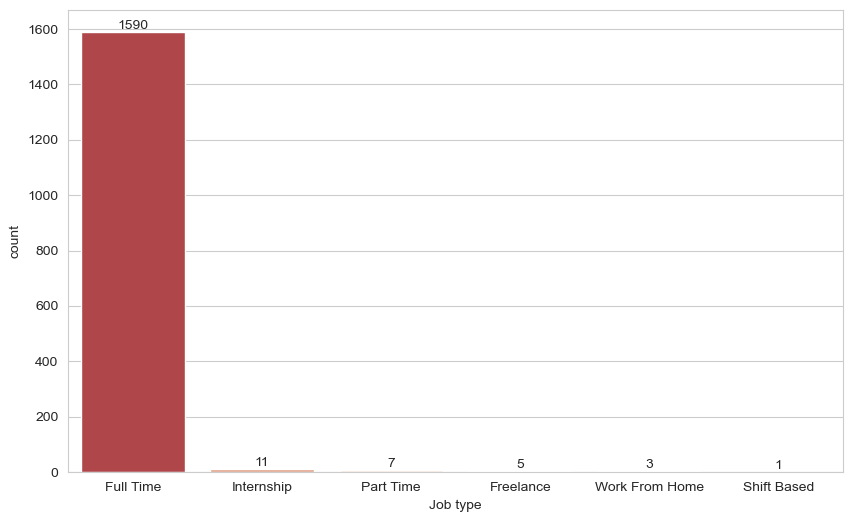

In [40]:
# Q1 : What are the most common Job type?

plt.figure(figsize = (10,6))
graph = sns.countplot(x = "Job type", data = data, order = data['Job type'].value_counts().index, palette = "RdBu")

for container in graph.containers:
    graph.bar_label(container)
    
plt.show() 

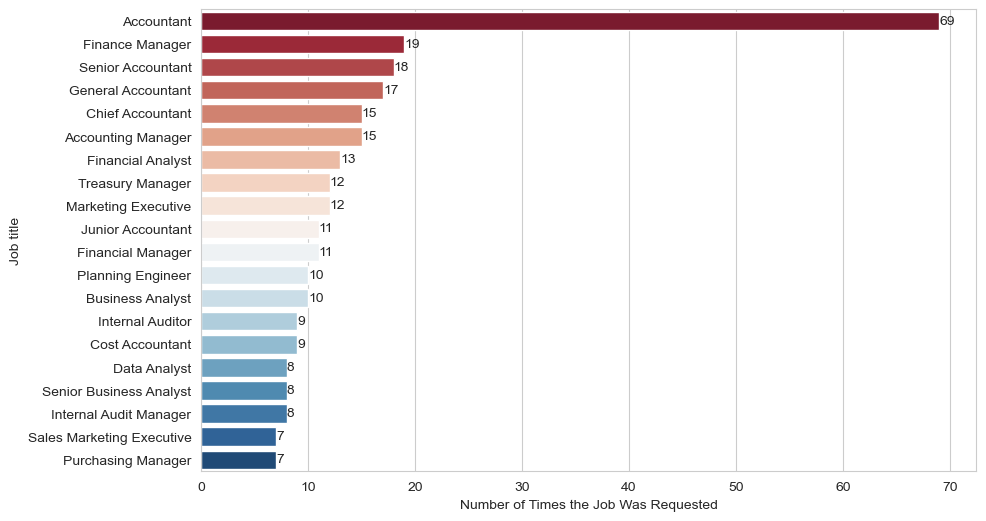

In [41]:
# Q2 : What is top 10 jobs?

plt.figure(figsize = (10,6))
graph = sns.countplot(y = "Job title", data = data, order = data["Job title"].value_counts().iloc[:20].index, palette = "RdBu")
plt.xlabel('Number of Times the Job Was Requested')

for container in graph.containers:
    graph.bar_label(container)
    
plt.show() 

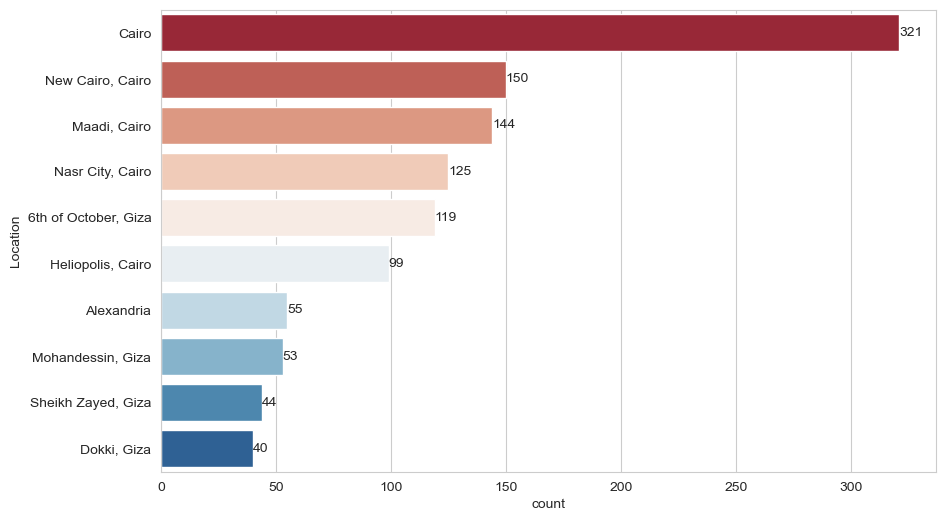

In [42]:
# Q3 : What is top 10 districts?

plt.figure(figsize = (10,6))
graph = sns.countplot(y = "Location", data = data, order = data.Location.value_counts().iloc[:10].index, palette = "RdBu")

for container in graph.containers:
    graph.bar_label(container)
    
plt.show() 

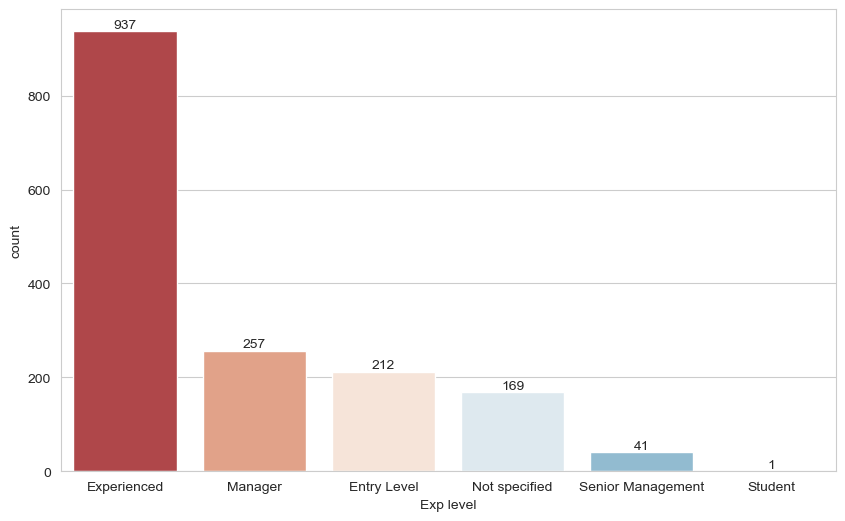

In [43]:
# Q4 : What level of experience is most required?

plt.figure(figsize = (10,6))
graph = sns.countplot(x = "Exp level", data = data, order = data['Exp level'].value_counts().index, palette = "RdBu")

for container in graph.containers:
    graph.bar_label(container)
    
plt.show() 

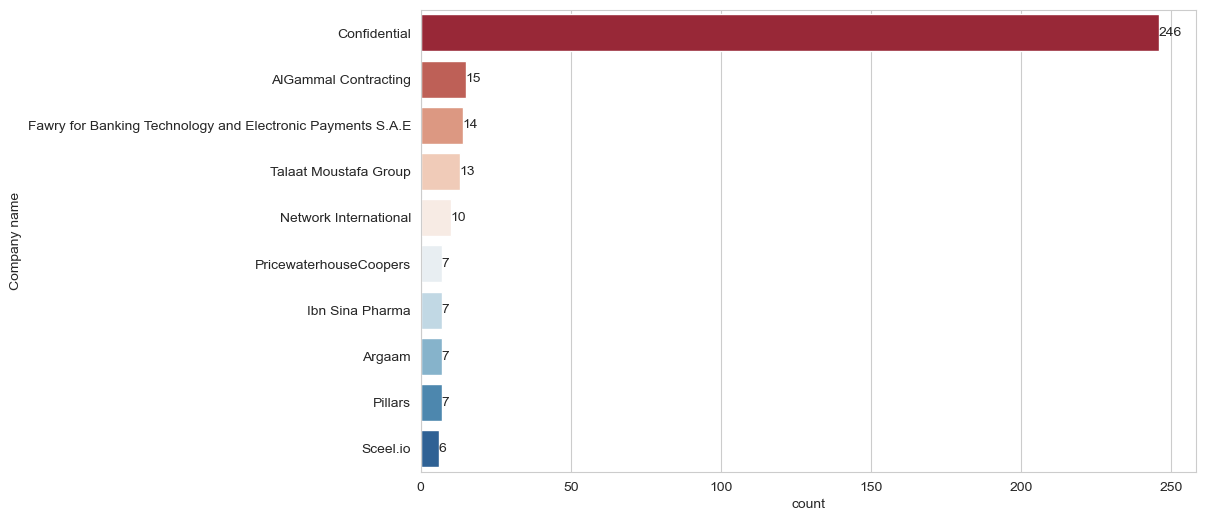

In [44]:
# Q5 : What company is most in demand for jobs?

plt.figure(figsize = (10,6))
graph = sns.countplot(y = "Company name", data = data, order = data["Company name"].value_counts().iloc[:10].index, palette = "RdBu")

for container in graph.containers:
    graph.bar_label(container)
    
plt.show() 

## Create a Dataframe skills

In [45]:
def counting_skills():
    # get list of all skills
    skill_list = list(data["Skills"])
    
    # join skills and union it
    skill =  ','.join(skill_list).split(',')
    
    # create skill count dictionary
    skill_count = collections.Counter(skill)
    
    return skill_count

In [46]:
skills = pd.DataFrame(columns = ["Skill", "Count"])
skills

,Skill,Count


- dataframe still empty 

In [47]:
# add data to dataFrame

for key,value in counting_skills().items():
     skills.loc[len(skills.index)] = [key, value]  

In [48]:
# see skills

skills

,Skill,Count
0,Accounting,943
1,Finance,911
2,Analyst,204
3,Research,219
4,Financial Analysis,403
...,...,...
1570,English Teaching,1
1571,Hr Director,1
1572,GCC,1
1573,Saudi,1


In [49]:
# sorted dataFrame by Count of skill

skills.sort_values(by = 'Count', ascending = False, inplace = True)

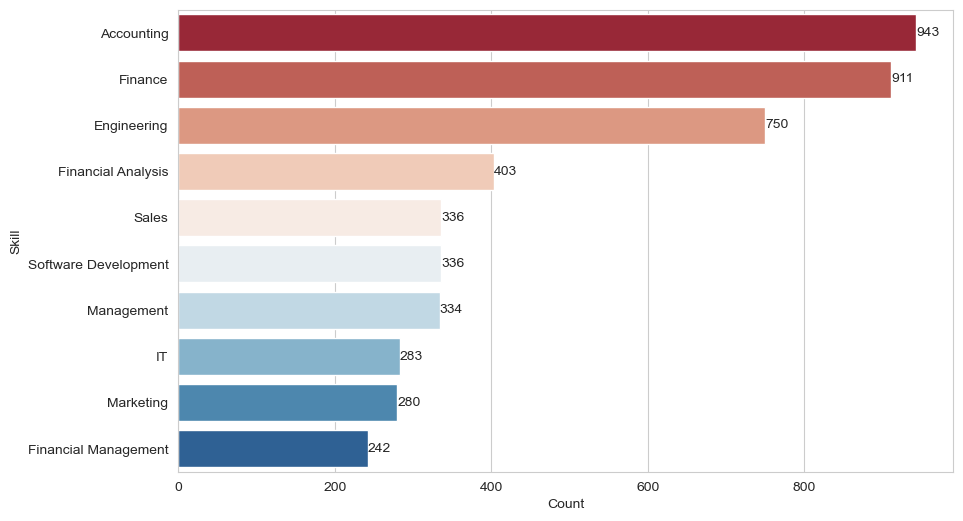

In [50]:
# Q6 What is top 10 skills?

plt.figure(figsize = (10,6))
graph = sns.barplot(y = "Skill", x = "Count", data = skills.iloc[:10], palette = "RdBu")

for container in graph.containers:
    graph.bar_label(container)
    
plt.show()

In [51]:
# save data after cleaning to csv file

data.to_csv("Wuzzuf data")